In [21]:
import pandas as pd

data = pd.read_excel('data.xlsx', parse_dates=['TIMESTAMP', 'FIRST DAY', 'INTERVENTION TIME'])


In [22]:
# print(data.head())

In [23]:
# print(data.dtypes)

In [24]:
# print(data.describe())

In [25]:
# There is an extra space in some columns' name ie. 'PREVIOUS '.
data.columns = data.columns.str.strip()

In [26]:
session_groups = data.groupby(['ID', 'SESSION'])  
  
# Iterate over each session and print the sequence of screens  
for (user_id, session_id), group in session_groups:  
    print(f"User ID: {user_id}, Session ID: {session_id}")  
    print(group[['PREVIOUS', 'CURRENT']])  
    print()  


User ID: 2, Session ID: 0
                               PREVIOUS  \
0          No previous screen available   
2                                 login   
3         Introduction_wellbeing page 1   
4         Introduction_wellbeing page 2   
5         Introduction_wellbeing page 3   
..                                  ...   
108          Sleep: module introduction   
109  Sleep: mindfulness rehearsal video   
110          Sleep: module introduction   
111          Sleep: module introduction   
112         Menu: health domain modules   

                                               CURRENT  
0                                                login  
2                        Introduction_wellbeing page 1  
3                        Introduction_wellbeing page 2  
4                        Introduction_wellbeing page 3  
5    Cornerstone_questionnaire: introduction 1 out ...  
..                                                 ...  
108                 Sleep: mindfulness rehearsal video  
1

In [54]:
data = data.sort_values(by=['ID', 'SESSION', 'TIMESTAMP'])  
  
# Calculate session duration for each user/session combination  
session_duration = data.groupby(['ID', 'SESSION']).agg(  
    SESSION_START=('TIMESTAMP', 'first'),  
    SESSION_END=('TIMESTAMP', 'last')  
)  
  
# Calculate the duration in seconds  
session_duration['SESSION_DURATION'] = (session_duration['SESSION_END'] - session_duration['SESSION_START']).dt.total_seconds()  
  
# Select the columns you want to print  
columns_to_print = ['ID', 'SESSION', 'SESSION_DURATION']  

# Reset the index to make 'ID' and 'SESSION' regular columns  
session_duration_reset = session_duration.reset_index()  

  
# Print the selected columns for all rows  
for index, row in session_duration_reset.iterrows():
    print(row[columns_to_print])
# print(session_duration_reset[columns_to_print])  


       ID  SESSION  SESSION_DURATION
0       2        0            1602.0
1       2        1            3247.0
2       2        2               2.0
3       2        3              26.0
4       2        4             180.0
...   ...      ...               ...
8793  614      106              60.0
8794  614      107              23.0
8795  614      108              15.0
8796  614      109              29.0
8797  614      110              16.0

[8798 rows x 3 columns]


In [38]:
zero_duration_count = len(session_duration[session_duration['SESSION_DURATION'] == 0])
print(f"Number of sessions with zero duration: {zero_duration_count}")  


Number of sessions with zero duration: 2115


In [44]:
# Plot the distribution of session durations 

non_zero_sessions = session_duration[session_duration['SESSION_DURATION'] > 0] 
for index, row in non_zero_sessions.iterrows():
        print(row['SESSION_DURATION'])
# plt.figure(figsize=(10, 6))  
# sns.histplot(non_zero_sessions['SESSION_DURATION'], bins=30, kde=True)  
# plt.title('Distribution of Session Durations')  
# plt.xlabel('Session Duration (seconds)')  
# plt.ylabel('Frequency')  
# plt.show()  

1602.0
3247.0
2.0
26.0
180.0
695.0
27.0
287.0
14.0
12.0
7.0
35.0
5.0
36.0
18477.0
2.0
12.0
19443.0
313.0
493.0
347.0
97.0
241.0
810.0
30.0
4.0
2586.0
400.0
2.0
43.0
14.0
2.0
1106.0
708.0
5.0
9.0
146.0
41.0
63.0
595.0
12.0
4.0
479.0
172.0
35.0
301.0
3.0
148.0
7.0
80285.0
292.0
88.0
51.0
83.0
261.0
365.0
102.0
134.0
6.0
7.0
69.0
1634.0
6225.0
268.0
14.0
6.0
38.0
94586.0
25.0
49.0
10.0
7.0
74.0
15.0
25.0
6.0
294.0
71.0
17.0
40.0
10.0
4.0
3.0
2.0
17.0
2.0
25.0
18.0
12.0
1.0
14.0
2.0
9.0
1.0
43.0
2.0
1.0
48.0
23.0
5.0
34626.0
1.0
2.0
38.0
9.0
13.0
73.0
1.0
3.0
19.0
2.0
1.0
13.0
94.0
8.0
41754.0
3.0
36.0
1.0
16.0
1.0
1.0
4.0
1.0
10.0
3.0
1.0
1.0
11.0
19.0
4.0
9.0
13.0
1.0
1.0
2.0
51.0
15.0
1.0
1.0
186750.0
3.0
5.0
7.0
8.0
3231.0
405.0
8.0
7.0
147.0
113.0
47.0
42.0
143.0
933.0
16.0
12.0
4.0
4.0
106.0
3.0
8.0
10.0
9.0
571.0
4.0
2.0
3.0
2.0
3975.0
4.0
1.0
69.0
13.0
128.0
3.0
3.0
3.0
3.0
29.0
6.0
3.0
2.0
2.0
3.0
13.0
110.0
2.0
52.0
1.0
2.0
11.0
2.0
3.0
2.0
2.0
39.0
2.0
2.0
7.0
3.0
2.0
1.0
4296.0

In [28]:
# Calculate Time Spent on Each Screen

# Ensure the data is sorted by user ID, session ID, and timestamp  
data = data.sort_values(by=['ID', 'SESSION', 'TIMESTAMP'])  
  
# Calculate the time spent on each screen  
data['TIME_SPENT'] = data.groupby(['ID', 'SESSION'])['TIMESTAMP'].diff().fillna(pd.Timedelta(seconds=0))  

# Convert the time spent to total seconds  
data['TIME_SPENT'] = data['TIME_SPENT'].dt.total_seconds()  

# Display the updated DataFrame  
print(data.head())  


   ID  SESSION                       PART                       PREVIOUS  \
0   2        0                      login   No previous screen available   
2   2        0     Introduction_wellbeing                          login   
3   2        0     Introduction_wellbeing  Introduction_wellbeing page 1   
4   2        0     Introduction_wellbeing  Introduction_wellbeing page 2   
5   2        0  Cornerstone_questionnaire  Introduction_wellbeing page 3   

                                             CURRENT           TIMESTAMP  \
0                                              login 2018-03-03 21:39:37   
2                      Introduction_wellbeing page 1 2018-03-03 21:42:59   
3                      Introduction_wellbeing page 2 2018-03-03 21:43:11   
4                      Introduction_wellbeing page 3 2018-03-03 21:43:17   
5  Cornerstone_questionnaire: introduction 1 out ... 2018-03-03 21:43:22   

            FIRST DAY   INTERVENTION TIME  TIME_SPENT  
0 2018-03-03 23:59:00 2018-04-

In [29]:
data.describe()

ID       SESSION                      TIMESTAMP  \
count  72154.000000  72154.000000                          72154   
mean     290.742246     27.629196  2018-03-18 14:44:22.980652544   
min        2.000000      0.000000            2018-03-01 12:01:19   
25%      107.000000      3.000000     2018-03-04 21:50:16.500000   
50%      295.000000     10.000000            2018-03-12 18:20:44   
75%      450.000000     31.000000  2018-03-29 05:33:39.249999872   
max      614.000000    364.000000            2018-08-14 18:00:11   
std      187.686860     43.950367                            NaN   

                           FIRST DAY              INTERVENTION TIME  \
count                            372                            372   
mean   2018-03-09 12:27:34.612903168  2018-05-03 12:27:34.612903424   
min              2018-03-01 22:23:21            2018-04-25 22:23:21   
25%              2018-03-02 23:59:59            2018-04-26 23:59:59   
50%              2018-03-03 23:59:59            2018-04-27 23:59:59   
75%              2018-03-13 05:59:59            2018-05-07 05:59:59   
max              2018-05-19 23:59:59            2018-07-13 23:59:59   
std                              NaN                            NaN   

         TIME_SPENT  
count  7.215400e+04  
mean   5.920845e+03  
min    0.000000e+00  
25%    1.000000e+00  
50%    3.000000e+00  
75%    1.000000e+01  
max    1.383392e+07  
std    1.403788e+05

In [30]:
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# Plot the distribution of time spent on each screen  
sns.histplot(data['TIME_SPENT'].dt.total_seconds(), bins=30)  
plt.xlabel('Time Spent (seconds)')  
plt.title('Distribution of Time Spent on Each Screen')  
plt.show()  


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
# Identifying the Most Common Navigation Paths
  
# Sort data by session and timestamp  
data = data.sort_values(by=['SESSION', 'TIMESTAMP'])  
  
# Create a navigation path for each session  
data['NAVIGATION_PATH'] = data.groupby('SESSION')['CURRENT'].transform(lambda x: ' -> '.join(x))  
  
# Drop duplicates to get unique paths per session  
unique_paths = data[['SESSION', 'NAVIGATION_PATH']].drop_duplicates()  
  
# Count the frequency of each path  
path_counts = unique_paths['NAVIGATION_PATH'].value_counts()  
  
# Display the most common paths  
print("Most Common Navigation Paths:")  
print(path_counts.head())  


Most Common Navigation Paths:
NAVIGATION_PATH
List of tools -> Tools: step counter                         23
List of tools -> Tools: rhythm your time                     22
Mainpage -> List of tools -> Tools: rhythm your time         14
List of tools                                                 9
List of tools -> Tools: rhythm your time -> List of tools     9
Name: count, dtype: int64


In [ ]:
# Correlating Navigation Patterns with Engagement Metrics

# Calculate session duration  
data['SESSION_DURATION'] = data.groupby('SESSION')['TIMESTAMP'].transform(lambda x: x.max() - x.min())  
  
# Calculate frequency of use (number of sessions per user)  
frequency_of_use = data.groupby('ID')['SESSION'].nunique()  
  
# Merge metrics back into the main DataFrame  
data = data.merge(frequency_of_use.rename('FREQUENCY_OF_USE'), on='ID')  
  
# Calculate correlation matrix  
correlation_matrix = data[['SESSION_DURATION', 'FREQUENCY_OF_USE']].corr()  
  
print("Correlation Matrix:")  
print(correlation_matrix)  


Correlation Matrix:
                  SESSION_DURATION  FREQUENCY_OF_USE
SESSION_DURATION          1.000000         -0.451319
FREQUENCY_OF_USE         -0.451319          1.000000


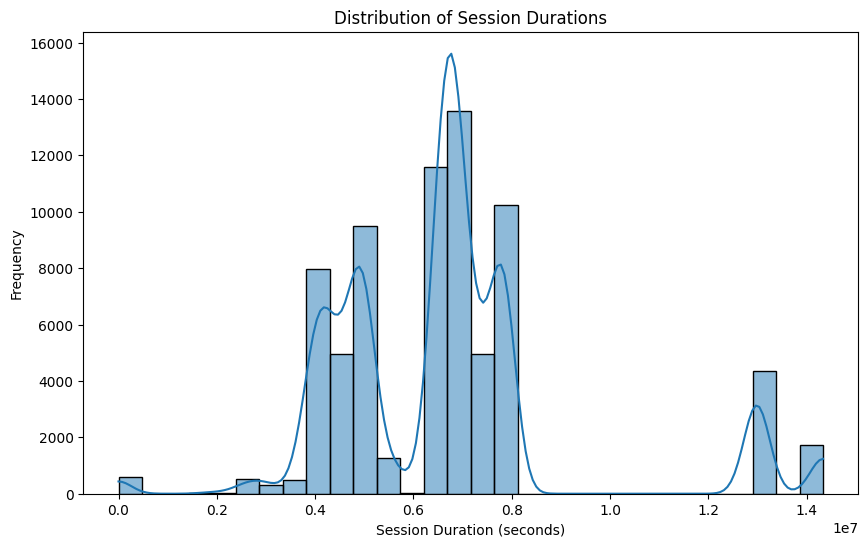

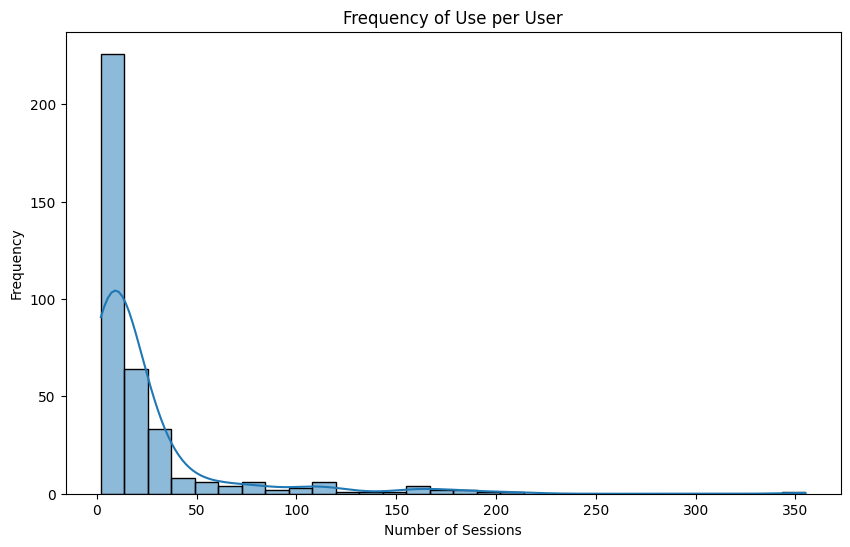

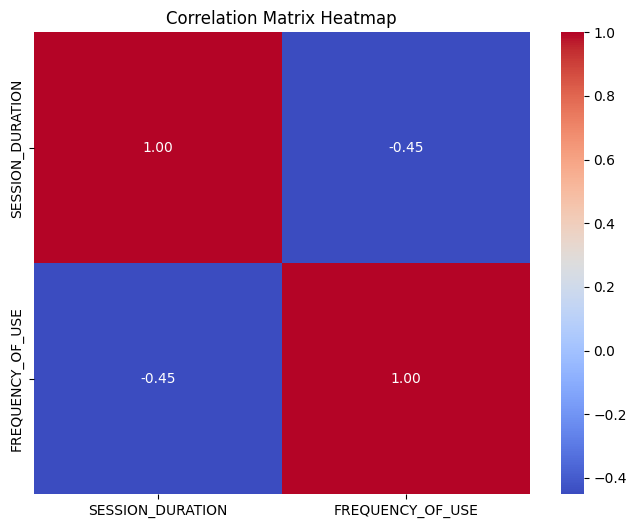

In [ ]:
# Visualising the Data for Better Insights

import matplotlib.pyplot as plt  
import seaborn as sns  
  
# Visualise the distribution of session durations  
plt.figure(figsize=(10, 6))  
sns.histplot(data['SESSION_DURATION'].dt.total_seconds(), bins=30, kde=True)  
plt.title('Distribution of Session Durations')  
plt.xlabel('Session Duration (seconds)')  
plt.ylabel('Frequency')  
plt.show()  
  
# Visualise the frequency of use  
plt.figure(figsize=(10, 6))  
sns.histplot(frequency_of_use, bins=30, kde=True)  
plt.title('Frequency of Use per User')  
plt.xlabel('Number of Sessions')  
plt.ylabel('Frequency')  
plt.show()  
  
# Visualise correlations using a heatmap  
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')  
plt.title('Correlation Matrix Heatmap')  
plt.show()  
